In [1]:
import re
import os
import math
import nltk
import time
import re
import string
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [4]:
import tensorflow as tf

In [5]:
#In this body of code, we have taken first 5000 rows of our original dataset to implement a code to test Regex, data cleaning
#Tokenization, stop words elimination - all operations on the "Bio" column of the data frame so that user profile data
#can be used in further analysis in the remaining stages. 

In [6]:
## K-means Clustering model - development

In [7]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [10]:
df_dating_RNN = pd.read_excel (r'C:\Users\mohit\Dropbox\PhD Rutgers University\Fall 2021 Course Material\Statistical Learning for Data science\Project\Data Cleaning\test1\Input_project_v11_age.xlsx')
print(df_dating_RNN)

       age age_group  status sex orientation       body_type  \
0       22     18_22  single   m    straight  a little extra   
1       22     18_22  single   f    straight        athletic   
2       22     18_22  single   m    straight             fit   
3       20     18_22  single   f    straight         average   
4       21     18_22  single   m    straight            thin   
...    ...       ...     ...  ..         ...             ...   
10845   65       51+  single   f    straight             fit   
10846   55       51+  single   f    straight    full figured   
10847   51       51+  single   m    straight         average   
10848   65       51+  single   f    straight           curvy   
10849   60       51+  single   m    straight         average   

                    diet    drinks  drinks_freq  drugs  ...  \
0      strictly anything  socially            1  never  ...   
1                    NaN  socially            1  never  ...   
2        mostly anything  socially        

In [11]:
df_dating_RNN = df_dating_RNN[df_dating_RNN['Bio'].notna()]

In [12]:
df_dating_RNN.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_dating_RNN["Bio"] = df_dating_RNN["Bio"].str.lower()

In [13]:
import nltk

df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()

<ipython-input-13-bac68a18b7dd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
<ipython-input-13-bac68a18b7dd>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
<ipython-input-13-bac68a18b7dd>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
<ipython-input-13-bac68a18b7dd>:6: FutureWarning: The default value of regex will change from

In [14]:
df_dating_top_RNN = df_dating_RNN.head()
df_dating_top_RNN

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [15]:
#Clean text Bio
bio_token_LR= pd.DataFrame(df_dating_RNN, columns = ['Bio'])
print(bio_token_LR[0:5])

                                                 Bio
0  about me i would love to think that i was some...
1  my name is ashley and i live in san francisco ...
2  fulltime student fulltime square i change from...
3  apparently has become a new favorite word of m...
4  i grew up in iowa it gets a bad rap but let me...


In [16]:
len(bio_token_LR)

10551

In [17]:
bio_token_LR.shape

(10551, 1)

In [18]:
# Let's check the dimensions of the dataframe
print(df_dating_RNN.shape)
print()
# let's look at the statistical aspects of the dataframe
print(df_dating_RNN.describe())
print()
# Let's see the type of each column
print(df_dating_RNN.info())

(10551, 25)

                age   drinks_freq        height
count  10551.000000  10551.000000  10551.000000
mean      34.475310      0.816510     68.247275
std       12.572841      0.387086      3.914318
min       18.000000      0.000000     36.000000
25%       24.000000      1.000000     65.000000
50%       30.000000      1.000000     68.000000
75%       44.000000      1.000000     71.000000
max       69.000000      1.000000     95.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10551 entries, 0 to 10849
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10551 non-null  int64 
 1   age_group        10551 non-null  object
 2   status           10551 non-null  object
 3   sex              10551 non-null  object
 4   orientation      10551 non-null  object
 5   body_type        9875 non-null   object
 6   diet             6861 non-null   object
 7   drinks           10551 non-null  ob

In [19]:
import pandas as pd
from nltk import word_tokenize

In [20]:
data = df_dating_RNN['Bio'].map(word_tokenize).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension 

In [21]:
len(total_vocabulary)

92701

In [22]:
print(data)

[list(['about', 'me', 'i', 'would', 'love', 'to', 'think', 'that', 'i', 'was', 'some', 'some', 'kind', 'of', 'intellectual', 'either', 'the', 'dumbest', 'smart', 'guy', 'or', 'the', 'smartest', 'dumb', 'guy', 'cant', 'say', 'i', 'can', 'tell', 'the', 'difference', 'i', 'love', 'to', 'talk', 'about', 'ideas', 'and', 'concepts', 'i', 'forge', 'odd', 'metaphors', 'instead', 'of', 'reciting', 'cliches', 'like', 'the', 'simularities', 'between', 'a', 'friend', 'of', 'mines', 'house', 'and', 'an', 'underwater', 'salt', 'mine', 'my', 'favorite', 'word', 'is', 'salt', 'by', 'the', 'way', 'weird', 'choice', 'i', 'know', 'to', 'me', 'most', 'things', 'in', 'life', 'are', 'better', 'as', 'metaphors', 'i', 'seek', 'to', 'make', 'myself', 'a', 'little', 'better', 'everyday', 'in', 'some', 'productively', 'lazy', 'way', 'got', 'tired', 'of', 'tying', 'my', 'shoes', 'considered', 'hiring', 'a', 'five', 'year', 'old', 'but', 'would', 'probably', 'have', 'to', 'tie', 'both', 'of', 'our', 'shoes', 'deci

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [24]:
Profiles_Bio = list(df_dating_RNN['Bio'])

In [25]:
Freq_drink = list(df_dating_RNN['drinks_freq'])

In [26]:
print(Freq_drink[0:10])

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]


In [27]:
type(Profiles_Bio)

list

In [28]:
bio_cluster = pd.DataFrame(df_dating_RNN, columns = ['education_group', 'age_group', 'drinks_freq', 'job_group', 'Bio'])

In [29]:
print(bio_cluster[0:5])

      education_group age_group  drinks_freq    job_group  \
0  college_university     18_22            1  blue_collar   
1  college_university     18_22            1      student   
2  college_university     18_22            1     business   
3  college_university     18_22            1  blue_collar   
4  college_university     18_22            1     s.t.e.m.   

                                                 Bio  
0  about me i would love to think that i was some...  
1  my name is ashley and i live in san francisco ...  
2  fulltime student fulltime square i change from...  
3  apparently has become a new favorite word of m...  
4  i grew up in iowa it gets a bad rap but let me...  


In [30]:
#CLS = pd.DataFrame(list((df_dating_RNN['drinks_freq'], df_dating_RNN['Bio'])) , columns=['text', 'label'])
#CLS.head()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(bio_cluster.Bio.values)

In [32]:
print(X)

  (0, 61908)	0.045869790120526874
  (0, 39696)	0.016026970247518407
  (0, 8212)	0.05651166597841644
  (0, 15202)	0.030756901993147897
  (0, 12621)	0.04246453445608206
  (0, 56777)	0.07074050107575829
  (0, 28093)	0.04392514888545627
  (0, 57736)	0.027980276925638616
  (0, 80164)	0.07932745795122904
  (0, 72022)	0.05501172571588236
  (0, 90234)	0.10134670755667691
  (0, 47940)	0.02140652650456366
  (0, 11584)	0.03738632516446168
  (0, 55778)	0.017587127808735874
  (0, 14908)	0.03562514636514723
  (0, 26525)	0.03721129604333836
  (0, 35461)	0.03649230812523358
  (0, 76267)	0.045865958901290714
  (0, 28675)	0.02347798930869064
  (0, 39178)	0.05971252439896411
  (0, 23307)	0.08666720781971166
  (0, 73483)	0.05335091753285973
  (0, 61944)	0.03649230812523358
  (0, 12869)	0.04898180291113638
  (0, 88662)	0.030783897599194632
  :	:
  (10550, 11319)	0.04486619098649606
  (10550, 41927)	0.1377077009458377
  (10550, 54689)	0.04959239389791343
  (10550, 2753)	0.06206151699402327
  (10550, 30745)	

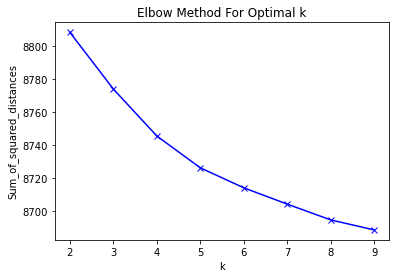

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
#vectorizer = TfidfVectorizer(stop_words='english')
#X = vectorizer.fit_transform(Profiles_Bio)

In [35]:
from sklearn.cluster import MiniBatchKMeans
random_state = 0 

In [36]:
cls = MiniBatchKMeans(n_clusters=6, random_state=random_state)
cls.fit(X)

MiniBatchKMeans(n_clusters=6, random_state=0)

In [37]:
#true_k = 6
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
#model.fit(X)
#labels=model.labels_
#Bio_clusters=pd.DataFrame(bio_token_LR, columns=['title','cluster'])
#print(Bio_clusters.sort_values(by=['cluster']))

In [38]:
true_k = 6
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
#model.fit(X)

In [39]:
print("Top terms per cluster:")
order_centroids = cls.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 to
 the
 and
 of
 my
 in
 it
 am
 that
 is
Cluster 1:
 the
 to
 some
 and
 of
 but
 offense
 loud
 wolves
 esp
Cluster 2:
 the
 and
 to
 of
 in
 my
 im
 that
 you
 for
Cluster 3:
 distance
 trust
 running
 swimming
 am
 trail
 to
 somebody
 is
 swim
Cluster 4:
 and
 to
 the
 my
 of
 in
 im
 am
 with
 you
Cluster 5:
 and
 the
 to
 my
 of
 in
 im
 you
 with
 for


Prediction


In [40]:
# predict cluster labels for new dataset
cls.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([2, 4, 2, ..., 5, 4, 2])

In [41]:
labels = np.unique(cls.labels_)

In [42]:
from sklearn.decomposition import PCA
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

No handles with labels found to put in legend.


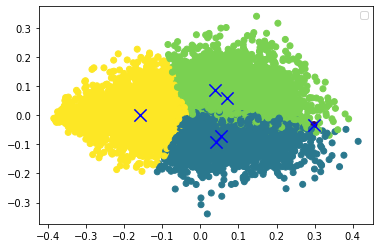

In [43]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


plt.legend()

In [44]:
#Estimating model performance for an unlabelled dataset
from sklearn.metrics import silhouette_score
silhouette_score(X, labels=cls.predict(X))

-0.06054933259736101

In [45]:
from sklearn.metrics import homogeneity_score
homogeneity_score(bio_cluster.education_group, cls.predict(X))

0.006501755133690864

In [46]:
from sklearn.metrics import homogeneity_score
homogeneity_score(bio_cluster.age_group, cls.predict(X))

0.01113289024595525

In [47]:
from sklearn.metrics import homogeneity_score
homogeneity_score(bio_cluster.job_group, cls.predict(X))

0.003955428170469865

In [48]:
from sklearn.metrics import homogeneity_score
homogeneity_score(bio_cluster.drinks_freq, cls.predict(X))

0.001996393376333992

In [49]:
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.

In [50]:
print("\n")
print("Prediction")

Y = vectorizer.transform([Profiles_Bio[100]])
prediction = cls.predict(Y)
print(prediction)

Y = vectorizer.transform([Profiles_Bio[1000]])
prediction = cls.predict(Y)
print(prediction)



Prediction
[2]
[4]


In [51]:
#pip install cufflinks --upgrade

In [52]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [53]:
df_dating_RNN['education_group'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Bio in category', 
                                                                title='Number of people in each category')

In [54]:
df_dating_RNN['age_group'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Bio in category', 
                                                                title='Number of people in each category')

In [55]:
df_dating_RNN['job_group'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Bio in category', 
                                                                title='Number of people in each category')

In [56]:
df_dating_RNN['drinks_freq'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Bio in category', 
                                                                title='Number of people in each category')